<a href="https://colab.research.google.com/github/yanviegas/eu_na_imersao_dados_2020_2/blob/main/aula_05_imersao_dados_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evento **IMERSÃO DADOS 2020.2**, organizado pela Alura Cursos Online

O Projeto teve como objetivo entender na prática um pouco sobre as habilidades, o trabalho e a carreira do profissional da área de Ciência de Dados, usando como trilha a análise de uma amostra dos dados do ENEM 2019.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados["NU_NOTA_SOMA_TOTAL"] = dados[provas].sum(axis = 1)
provas.append("NU_NOTA_SOMA_TOTAL")
dados_sem_notas_nulas = dados.query("NU_NOTA_SOMA_TOTAL != 0")
sem_nan_dados_sem_notas_nulas = dados_sem_notas_nulas[provas].dropna()
provas_entrada = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']
provas_saida = ['NU_NOTA_MT']
notas_entrada = sem_nan_dados_sem_notas_nulas[provas_entrada]
notas_saida = sem_nan_dados_sem_notas_nulas[provas_saida]
x = notas_entrada
import numpy as np
y = np.ravel(notas_saida)
from sklearn.model_selection import train_test_split
seed = 28
x_tr, x_tes, y_tr, y_tes = train_test_split(x, y, test_size = 0.20, random_state = seed)

#**AULA 05: VALIDAÇÃO DE MODELO E OVERFITTING**

In [3]:
from sklearn.svm import LinearSVR
seed = 28
modelo = LinearSVR(random_state = seed)
modelo.fit(x_tr, y_tr)
predictions_mt_2 = modelo.predict(x_tes)
predictions_mt_2

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([540.8382049 , 779.87834809, 677.40207144, ..., 645.77093984,
       695.97629947, 639.91234836])

In [5]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_tes, predictions_mt_2)

14678.163832448041

In [6]:
from sklearn.tree import DecisionTreeRegressor
tree_modelo = DecisionTreeRegressor(max_depth = 4)
tree_modelo.fit(x_tr, y_tr)
tree_predictions = tree_modelo.predict(x_tes)
tree_predictions

array([451.70148172, 704.85340537, 553.050921  , ..., 553.050921  ,
       585.70122825, 553.050921  ])

In [7]:
mean_squared_error(y_tes, tree_predictions)

5757.9253646651905

In [8]:
from sklearn.model_selection import cross_validate
tree_modelo = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(tree_modelo, x, y, cv = 20, scoring = "neg_mean_squared_error")
resultados

{'fit_time': array([0.05992675, 0.05775833, 0.06270957, 0.05552435, 0.05526018,
        0.06167436, 0.06440473, 0.05638576, 0.05801201, 0.05387044,
        0.05519676, 0.05555844, 0.0609889 , 0.05641007, 0.05529475,
        0.0596869 , 0.05582547, 0.05551028, 0.05748248, 0.05741262]),
 'score_time': array([0.00146174, 0.00133634, 0.00128508, 0.00132966, 0.00142384,
        0.00148582, 0.00128818, 0.00154138, 0.00150657, 0.0013063 ,
        0.00129986, 0.00130534, 0.00127149, 0.00250912, 0.00130749,
        0.00130987, 0.00129747, 0.00129676, 0.00128245, 0.00137115]),
 'test_score': array([-5838.67245901, -6390.85163301, -6775.01020712, -6297.0008725 ,
        -6158.33418228, -6525.17941064, -6444.01587382, -6489.26987129,
        -6113.47567017, -6353.14420705, -6828.89634083, -6764.99355994,
        -6755.67427883, -6768.92395105, -6840.15064911, -6587.57831494,
        -6572.52893374, -6685.67419878, -6793.91110807, -7365.7875368 ])}

In [9]:
media = (-1)*resultados["test_score"].mean()
media

6567.453662948976

In [10]:
d_p = resultados["test_score"].std()
d_p

322.6342184831726

In [11]:
lim_inf = media - (2*d_p)
lim_sup = media + (2*d_p)
print(f"Intervalo de confianca: [{lim_inf}, {lim_sup}]")

Intervalo de confianca: [5922.18522598263, 7212.722099915321]


In [12]:
def calcula_mse(resultados):
  media = (-1)*resultados["test_score"].mean()
  d_p = resultados["test_score"].std()
  lim_inf = media - (2*d_p)
  lim_sup = media + (2*d_p)
  print(f"Intervalo de confianca: [{lim_inf}, {lim_sup}]")

In [13]:
from sklearn.model_selection import KFold
import numpy as np
np.random.seed(seed)
partes = KFold(n_splits = 20, shuffle = True)
tree_modelo = DecisionTreeRegressor(max_depth = 4)
resultados = cross_validate(tree_modelo, x, y, cv = partes, 
                            scoring = "neg_mean_squared_error", return_train_score = True)
resultados

{'fit_time': array([0.11609221, 0.11440921, 0.10834837, 0.10344124, 0.10597396,
        0.10747766, 0.10771632, 0.10352516, 0.10852647, 0.11089373,
        0.10514784, 0.10795259, 0.10501218, 0.10500932, 0.11326814,
        0.10607433, 0.11057234, 0.11345148, 0.10402751, 0.10350442]),
 'score_time': array([0.00140595, 0.00136948, 0.0014081 , 0.00142407, 0.0015471 ,
        0.00136471, 0.00135851, 0.00135684, 0.00140572, 0.00139666,
        0.00139499, 0.00137234, 0.00136113, 0.0013752 , 0.00138283,
        0.00136828, 0.00137138, 0.00229812, 0.00136065, 0.00138474]),
 'test_score': array([-5890.24590853, -5807.24521371, -5632.24698877, -5792.04271836,
        -5850.99429365, -5862.87825139, -5634.60162184, -5795.49455116,
        -5933.28967158, -5695.09326039, -5866.73301067, -5851.84892822,
        -5916.29404544, -6046.06375511, -5797.75396499, -5554.78822407,
        -5987.35102837, -5755.87177787, -5768.01980839, -5896.0778468 ]),
 'train_score': array([-5761.69108653, -5759.37616

In [14]:
calcula_mse(resultados)

Intervalo de confianca: [5579.199589824724, 6054.293897108613]


In [15]:
def tree_regressor(nivel):
  seed = 28
  np.random.seed(seed)
  partes = KFold(n_splits = 10, shuffle = True)
  tree_modelo = DecisionTreeRegressor(max_depth = nivel)
  resultados = cross_validate(tree_modelo, x, y, cv = partes, 
                              scoring = "neg_mean_squared_error", return_train_score = True)
  print(f"Treino = {(resultados['train_score']*-1).mean()} \t \
                    Teste = {(resultados['test_score']*-1).mean()}")
tree_regressor(7)

Treino = 5443.493771783097 	                     Teste = 5583.160907847721


In [16]:
for j in range(0, 28):
  tree_regressor(1 + j)

Treino = 7844.783628942707 	                     Teste = 7863.054719881892
Treino = 6528.462743144721 	                     Teste = 6552.615115623267
Treino = 6021.461527413556 	                     Teste = 6054.589076225231
Treino = 5765.2211198869945 	                     Teste = 5808.877919155504
Treino = 5617.853763191265 	                     Teste = 5693.447343106953
Treino = 5518.231373137913 	                     Teste = 5632.347913217409
Treino = 5443.493771783097 	                     Teste = 5583.160907847721
Treino = 5374.117813883334 	                     Teste = 5604.750604424957
Treino = 5282.347971408868 	                     Teste = 5689.318324462696
Treino = 5160.044420437416 	                     Teste = 5822.582062731699
Treino = 4996.259970200201 	                     Teste = 5999.069934685354
Treino = 4791.054182791575 	                     Teste = 6202.322970404408
Treino = 4545.150942141053 	                     Teste = 6465.455322807614
Treino = 4264.6091973083

#A04. Desafio 04: Pesquisar o que é o problema de underfitting. 

###Overfitting 
Um cenário de ***overfitting*** ocorre quando, nos dados de treino, o modelo tem um desempenho excelente, porém quando utilizamos os dados de teste o resultado é ruim. Podemos entender que, neste caso, o modelo aprendeu tão bem as relações existentes no treino, que acabou apenas decorando o que deveria ser feito, e ao receber as informações das variáveis preditoras nos dados de teste, o modelo tenta aplicar as mesmas regras decoradas, porém com dados diferentes esta regra não tem validade, e o desempenho é afetado. É comum ouvirmos que neste cenário o modelo treinado não tem capacidade de generalização. 

###Underfitting
Um cenário de ***underfitting*** ocorre quando o desempenho do modelo já é ruim no próprio treinamento. O modelo não consegue encontrar relações entre as variáveis e o teste nem precisa acontecer. Este modelo já pode ser descartado, pois não terá utilidade.

##Fonte: https://didatica.tech/underfitting-e-overfitting/

#A05. Desafio 05: Plotar um gráfico para avaliar a relação entre os "scores" de treino e os "scores" de teste.

In [17]:
def tree_regressor(nivel):
  seed = 28
  np.random.seed(seed)
  partes = KFold(n_splits = 10, shuffle = True)
  tree_modelo = DecisionTreeRegressor(max_depth = nivel)
  resultados = cross_validate(tree_modelo, x, y, cv = partes, 
                              scoring = "neg_mean_squared_error", return_train_score = True)
  return [(-1)*resultados['train_score'].mean(), (-1)*resultados['test_score'].mean()]
tree_regressor(4)

[5765.2211198869945, 5808.877919155504]

Text(0.5, 1.0, 'TRAIN SCORING vs. TEST SCORING')

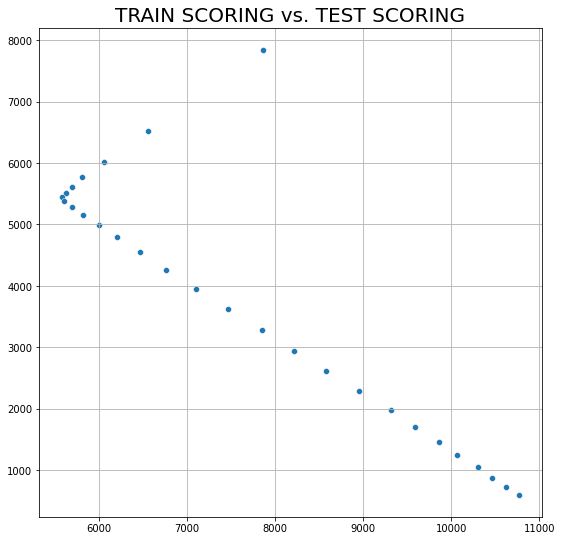

In [18]:
tst_scr = []; tr_scr = []
for j in range(0, 28):
  res = tree_regressor(1 + j)
  tr_scr.append(res[0])
  tst_scr.append(res[1])
plt.figure(figsize = (9, 9)); plt.grid(True)
sns.scatterplot(x = tst_scr, y = tr_scr)
plt.title("TRAIN SCORING vs. TEST SCORING", fontsize = 20)